# Will it be an early Spring?

On February 2<sup>nd</sup> every year Punxsutawney Phil makes a prediction about if there will be an early Spring or if Winter will continue for 6 more weeks (till about mid-March). He is however not very accurate (well, according to [The Inner Circle](https://www.groundhog.org/inner-circle) he is 100% correct but the human handler may not interpret his response correctly). The overall goal is to be able to predict if it will be an early Spring.

For this project you must go through most steps in the checklist. You must write responses for all items however sometimes the item will simply be "does not apply". Some of the parts are a bit more nebulous and you simply show that you have done things in general (and the order doesn't really matter). Keep your progress and thoughts organized in this document and use formatting as appropriate (using markdown to add headers and sub-headers for each major part). Do not do the final part (launching the product) and your presentation will be done as information written in this document in a dedicated section, no slides or anything like that. It should however include the best summary plots/graphics/data points.

You are intentionally given very little information thus far. You must communicate with your client (me) for additional information as necessary. But also make sure that your communications are efficient, thought out, and not redundant as your client might get frustrated and "fire" you (this only applies to getting information from your client, this does not necessary apply to asking for help with the actual project itself - you should continuously ask questions for getting help).

You must submit all data files and a pickled final model along with this notebook.

The group with the best results on the 10% of the data that I kept for myself will earn +5 extra credit (if multiple groups are close points may be given to multiple groups).

Questions For Client 
====================
- Can you provide more context on how these predictions were made? For example, are these predictions based solely on Punxsutawney Phil, or do they also consider meteorological data?

- How accurate are these predictions historically when compared to actual meteorological outcomes?

- Are there additional datasets you would recommend or provide that could help enhance our analysis, such as meteorological data for each of these years?

- Are there any benchmarks or previous studies on this topic that we should compare our results against?


Questions For Professor 
=======================
- What specific performance metrics are most important for evaluating our predictive model in this case? what we feel is more appropiate , get all trues that you can. 

(test on 10 percent of the data) make a our own test set. 

- Beyond the model and the documentation, are there specific forms of visualizations or types of analysis you expect in our final report?
exploration go through steps 

- Would you recommend any specific statistical tests or analytical methods to understand the impact of various factors on Phil's predictions?
el nino la nina 

- Do you have any preferred data sources? Or are there constraints around data collection?

- About how many years of historical data should we analyze to make these predictions?
Peredicting for this year make it reusable for future. 

- What kind of performance improvements are expected in comparison to Punxsutawney Phil’s historical accuracy?

- Should we focus on any particular region (e.g., Pennsylvania, where Phil makes predictions), or should we generalize for wider use?





## Project Notes

- **Climatic Phenomena Investigation**
  - Research and incorporate data on La Niña or El Niño, as these climatic events may impact the likelihood of an early spring.

- **New Crop Development**
  - Investigate the potential for growing a new type of corn in harsher climates.
  - Assess the feasibility of achieving two harvests in one year if an early spring occurs, potentially doubling productivity.

- **Economic Decision Making**
  - Utilize the predictive model to determine the advisability of purchasing seeds early, based on the likelihood of an early spring. This decision impacts potential double profit or the risk of financial loss.

- **Model Reusability**
  - Design the model to be adaptable for use in future years to ensure its continued relevance and utility.

## Data Insights and Requirements

- **Historical Data Analysis**
  - Review indicates that 50% of the data suggests an early spring, correlating with a 65% increase in profits over regular years.

- **Weather Data Collection**
  - Use weather data collected by the intern, focusing on specific early spring indicators:
    - An early spring is indicated by a 5-day period where:
      - **Average Air Temperature:** Above 40°F.
      - **Minimum Air Temperature:** Above 32°F.
      - **Average Soil Temperature:** Above 50°F.
      - This period must occur on or before April 1st.
      - **Snow Condition:** No snow on the ground throughout this 5-day period.

## Operational Constraints

- **Seed Purchase Deadline**
  - Seeds must be purchased by February 25th to prepare for a potential early planting season, based on the model’s predictions.

## Testing and Validation

- **Test Set Creation**
  - Set aside 10% of the data to create a test set, ensuring that the model's accuracy is evaluated against unseen data.

## Historical Data Context

- **Additional Parameters for Analysis**
  - Include historical data on air temperatures and rainfall over the last 77 years to enhance model training and predictive accuracy.


In [2]:
# All of your imports here (you may need to add some)
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## Frame the Problem and Look at the Big Picture

1. **Define the objective in business terms:**  
   <mark>Investigate the potential for growing a new type of corn in harsher climates. This aims to lead to more reliable planning for businesses and individuals affected by seasonal changes (e.g., agriculture, retail, event planning), potentially increasing profits by 60 percent if predicted correctly.</mark>

2. **How will your solution be used?**  
   <mark>The solution would likely be used by the client as a tool to understand when to plant this new corn.</mark>

3. **How should you frame this problem?**  
   <mark>As a binary classification problem where the goal is to predict one of two possible outcomes: early Spring or continued Winter.</mark>

4. **How should performance be measured? Is the performance measure aligned with the business objective?**  
   <mark>Performance should be measured using accuracy, precision, recall, and F1-score for the binary classification model. Accuracy gives a general sense of how well the model is performing, but precision and recall help understand the balance between predicting early Spring and extended Winter. If one class is more frequent than the other, focusing only on accuracy might lead to skewed results.</mark>

5. **What would be the minimum performance needed to reach the business objective?**  
   <mark>A minimum acceptable performance level might be set around 60% accuracy, which would represent a significant improvement. However, achieving an accuracy closer to 70-80% would provide more confidence and a stronger business case for users to adopt the model.</mark>

6. **What are comparable problems? Can you reuse (personal or readily available) experience or tools?**  
   <mark>Weather forecasting models that predict seasonal shifts based on historical data and meteorological patterns. Existing tools that can be reused include Python libraries such as scikit-learn for machine learning, pandas for data analysis, and matplotlib/seaborn for visualization.</mark>

7. **Is human expertise available?**  
   <mark>Yes, the client who is an experienced farmer.</mark>

8. **How would you solve the problem manually?**  
   <mark>This is essentially an almanac, which has already been done. The manual process would involve: Collecting historical weather data and Punxsutawney Phil’s past predictions, identifying the key variables that might influence the seasonal shift, analyzing the patterns in the data, and making our own predictions based on the observed trends.</mark>

9. **List the assumptions you (or others) have made so far. Verify assumptions if possible.**  
   <mark>.</mark>


## Frame the Problem and Look at the Big Picture

1. **Define the objective in business terms:**  
   <mark>Investigate the potential for growing a new type of corn in harsher climates. This aims to lead to more reliable planning for businesses and individuals affected by seasonal changes (e.g., agriculture, retail, event planning), potentially increasing profits by 60 percent if predicted correctly.</mark>

2. **How will your solution be used?**  
   <mark>The solution would likely be used by the client as a tool to understand when to plant this new corn.</mark>

3. **How should you frame this problem?**  
   <mark>As a binary classification problem where the goal is to predict one of two possible outcomes: early Spring or continued Winter.</mark>

4. **How should performance be measured? Is the performance measure aligned with the business objective?**  
   <mark>Performance should be measured using accuracy, precision, recall, and F1-score for the binary classification model. Accuracy gives a general sense of how well the model is performing, but precision and recall help understand the balance between predicting early Spring and extended Winter. If one class is more frequent than the other, focusing only on accuracy might lead to skewed results.</mark>

5. **What would be the minimum performance needed to reach the business objective?**  
   <mark>A minimum acceptable performance level might be set around 60% accuracy, which would represent a significant improvement. However, achieving an accuracy closer to 70-80% would provide more confidence and a stronger business case for users to adopt the model.</mark>

6. **What are comparable problems? Can you reuse (personal or readily available) experience or tools?**  
   <mark>Weather forecasting models that predict seasonal shifts based on historical data and meteorological patterns. Existing tools that can be reused include Python libraries such as scikit-learn for machine learning, pandas for data analysis, and matplotlib/seaborn for visualization.</mark>

7. **Is human expertise available?**  
   <mark>Yes, the client who is an experienced farmer.</mark>

8. **How would you solve the problem manually?**  
   <mark>This is essentially an almanac, which has already been done. The manual process would involve: Collecting historical weather data and Punxsutawney Phil’s past predictions, identifying the key variables that might influence the seasonal shift, analyzing the patterns in the data, and making our own predictions based on the observed trends.</mark>

9. **List the assumptions you (or others) have made so far. Verify assumptions if possible.**  
   <mark>.</mark>


In [29]:
import pandas as pd

def read_PivotedEnso():
    """
    Reads the ENSO data file and returns a pandas DataFrame.
    """
    enso = pd.read_csv("Pivoted_ENSO_Dataset.csv")
    enso.columns = enso.columns.str.strip()

    return enso


def read_philPred():
    """
    Reads the Punxsutawney Phil predictions data file and returns a pandas DataFrame.
    """
    phil_pred = pd.read_csv("phil_pred.csv")
    return phil_pred

def read_soil():
    """
    Reads the soil data file and returns a pandas DataFrame.
    """
    soil = pd.read_csv("soil.csv")
    return soil

def read_early_spring():
    """
    Reads the early spring data file and returns a pandas DataFrame.
    """
    early_spring = pd.read_csv("early_spring.csv")
    return early_spring

def read_weather():
    """
    Reads the weather data file and returns a pandas DataFrame.
    """
    weather = pd.read_csv("weather.csv")
    return weather

def merge_weather_soil():
    """
    Merges the weather and soil datasets on the 'Date' column.
    Returns the merged DataFrame.
    """
    # Load the datasets
    weather = read_weather()
    soil = read_soil()

    # Merge the datasets on the 'Date' column
    merged_w_s = pd.merge(weather, soil, on='date', how='inner')

    # Save the merged dataset to a CSV file
    merged_w_s.to_csv("merged_weather_soil.csv", index=False)

    return merged_w_s 

def merge_all_datasets():
   """
    Merges the following datasets on the 'Year' column:
    - Pivoted Weather and Soil data
    - Punxsutawney Phil predictions
    - Pivoted ENSO Dataset
    - Early Spring data

    The function also writes the merged DataFrame to a CSV file.

    Parameters:
    output_path (str): The path to save the merged dataset CSV file.
    
    Returns:
    merged_data (DataFrame): The merged DataFrame.
    """
    # Load datasets
   pivoted_weather_soil = pd.read_csv('final_pivoted_weather_soil.csv')
   phil_pred = pd.read_csv('phil_pred.csv')
   enso_dataset = pd.read_csv('Pivoted_ENSO_Dataset.csv')
   early_spring = pd.read_csv('early_spring.csv')

    # Merge datasets
   merged_data = pd.merge(pivoted_weather_soil, phil_pred, on='Year', how='inner')
   merged_data = pd.merge(merged_data, enso_dataset, on='Year', how='inner')
   merged_data = pd.merge(merged_data, early_spring, on='Year', how='inner')
   
   # Write the merged DataFrame to a CSV file
   merged_data.to_csv("All_MergedData.csv", index=False)

   return merged_data

def read_All_Merged_Data():
    """
    Reads the final merged data file and returns a pandas DataFrame.
    """
    final_merged_data = pd.read_csv("All_MergedData.csv")
    return final_merged_data

def drop_columns(input_file, output_file):
    """
    This function drops the specified columns related to 'TNI' and 'PNA' from the input CSV file
    and saves the cleaned dataset to the output file.

    Parameters:
    input_file (str): Path to the input CSV file.
    output_file (str): Path to save the cleaned dataset CSV file.
    """
    # Load the dataset
    data = pd.read_csv(input_file)

    # Columns to drop
    columns_to_drop = [
        'TNI(APR)', 'TNI(AUG)', 'TNI(DEC)', 'TNI(FEB)', 'TNI(JAN)', 'TNI(JUL)', 'TNI(JUN)', 'TNI(MAR)', 'TNI(MAY)', 'TNI(NOV)', 'TNI(OCT)', 'TNI(SEP)',
        'PNA(APR)', 'PNA(AUG)', 'PNA(DEC)', 'PNA(FEB)', 'PNA(JAN)', 'PNA(JUL)', 'PNA(JUN)', 'PNA(MAR)', 'PNA(MAY)', 'PNA(NOV)', 'PNA(OCT)', 'PNA(SEP)'
    ]

    # Drop the specified columns
    cleaned_data = data.drop(columns=columns_to_drop)

    # Save the cleaned dataset to the specified output file
    cleaned_data.to_csv(output_file, index=False)

def split_data():
    """
    This function splits the final merged dataset into training and testing sets.
    The function returns the training and testing sets as pandas DataFrames.
    """
    # Load the final merged dataset
    final_merged_data = pd.read_csv("Final_MergedData.csv")

    # Split the dataset into training and testing sets
    train, test = train_test_split(final_merged_data, test_size=0.2, random_state=42 ) #add a another argument for stratify

    return train, test
def create_label_feature():
    






In [ ]:
merge_all_datasets()
allMergedData = read_All_Merged_Data()
drop_columns('All_MergedData.csv', 'Final_MergedData.csv')

In [4]:
pivotedEnso = read_PivotedEnso()
PhilData = read_philPred()

In [5]:
allMergedData.head()

,Year,max_temp_01-01,max_temp_01-02,max_temp_01-03,max_temp_01-04,max_temp_01-05,max_temp_01-06,max_temp_01-07,max_temp_01-08,max_temp_01-09,...,TNI(FEB),TNI(JAN),TNI(JUL),TNI(JUN),TNI(MAR),TNI(MAY),TNI(NOV),TNI(OCT),TNI(SEP),early_spring
0,1950,49.0,53.0,61.0,69.0,54.0,53.0,43.0,30.0,48.0,...,0.445,0.624,0.293,0.213,0.382,0.124,0.993,0.690,0.564,False
1,1951,40.0,46.0,52.0,50.0,41.0,46.0,36.0,23.0,30.0,...,1.461,1.315,1.521,1.627,1.590,1.615,0.492,0.799,1.255,False
2,1952,68.0,52.0,39.0,36.0,39.0,32.0,32.0,35.0,48.0,...,-0.293,0.168,-0.702,-0.718,-0.368,-0.567,-0.566,-0.449,-0.704,True
3,1953,34.0,42.0,42.0,33.0,28.0,28.0,31.0,37.0,42.0,...,0.150,-0.027,0.409,0.532,0.325,0.428,-0.426,0.128,0.120,True
4,1954,42.0,51.0,44.0,32.0,31.0,29.0,30.0,31.0,44.0,...,-1.250,-0.655,-1.338,-1.800,-1.788,-1.839,-0.189,-0.464,-0.607,False


In [6]:
allMergedData.shape

(66, 855)

In [7]:
allMergedData.describe()

,Year,max_temp_01-01,max_temp_01-04,max_temp_01-05,max_temp_01-08,max_temp_01-10,max_temp_01-12,max_temp_01-13,max_temp_01-15,max_temp_01-17,...,TNI(DEC),TNI(FEB),TNI(JAN),TNI(JUL),TNI(JUN),TNI(MAR),TNI(MAY),TNI(NOV),TNI(OCT),TNI(SEP)
count,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.00000,...,64.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,1986.969697,39.469697,38.378788,37.196970,34.439394,35.136364,37.848485,39.348485,35.530303,33.69697,...,-0.265641,-0.163215,-0.176092,-0.447262,-0.402800,-0.176754,-0.328923,-0.331708,-0.385585,-0.450138
std,21.701450,11.469317,13.570063,12.418621,12.947383,11.969045,13.521769,13.913460,12.029732,12.82182,...,1.243861,1.387574,1.362175,1.451487,1.488158,1.394689,1.456963,1.203269,1.242842,1.313350
min,1950.000000,12.000000,9.000000,11.000000,2.000000,8.000000,10.000000,14.000000,9.000000,-1.00000,...,-2.571000,-2.644000,-2.649000,-3.376000,-2.999000,-2.910000,-3.040000,-2.505000,-2.731000,-2.993000
25%,1969.500000,33.000000,30.000000,31.000000,25.000000,27.000000,26.250000,29.250000,25.250000,27.00000,...,-1.266250,-1.260000,-1.342000,-1.449000,-1.441000,-1.287000,-1.395000,-1.264000,-1.291000,-1.412000
50%,1986.500000,38.000000,36.000000,38.500000,34.000000,36.000000,38.500000,36.500000,34.500000,33.50000,...,-0.288000,-0.293000,-0.127000,-0.526000,-0.564000,-0.347000,-0.481000,-0.302000,-0.404000,-0.463000
75%,2005.750000,44.750000,49.750000,43.750000,40.750000,44.000000,46.750000,47.500000,45.000000,42.50000,...,0.582750,0.753000,0.701000,0.191000,0.333000,0.661000,0.623000,0.371000,0.341000,0.214000
max,2023.000000,70.000000,71.000000,66.000000,69.000000,59.000000,69.000000,70.000000,65.000000,65.00000,...,2.858000,2.870000,2.716000,4.143000,4.227000,3.045000,3.734000,3.037000,3.090000,3.183000


In [8]:
allMergedData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Columns: 855 entries, Year to early_spring
dtypes: bool(2), float64(571), int64(1), object(281)
memory usage: 440.1+ KB


Explore the Data
================


1. Copy the data for exploration, downsampling to a manageable size if necessary.

2. Study each attribute and its characteristics: Name; Type (categorical, numerical, bounded, text, structured, ...); % of missing values; Noisiness and type of noise (stochastic, outliers, rounding errors, ...); Usefulness for the task; Type of distribution (Gaussian, uniform, logarithmic, ...)

3. For supervised learning tasks, identify the target attribute(s)

4. Visualize the data

5. Study the correlations between attributes

Study how you would solve the problem manually

6. Identify the promising transformations you may want to apply

7. Identify extra data that would be useful (go back to “Get the Data”)


In [ ]:
train_test_split

In [10]:
def read_final_merged_data():
    """
    Reads the final merged data file and returns a pandas DataFrame.
    """
    final_merged_data = pd.read_csv("Final_MergedData.csv")
    return final_merged_data

ExploreData = read_final_merged_data()

In [11]:
df_weather = read_weather()

In [12]:
df_weather["min_temp"].value_counts()

min_temp
28.0     139
25.0     138
21.0     137
22.0     129
24.0     129
        ... 
-21.0      3
-20.0      2
-24.0      2
-26.0      1
55.0       1
Name: count, Length: 76, dtype: int64

In [13]:
df_weather["avg_temp"].value_counts()

avg_temp
30.0     89
26.5     87
29.5     82
34.0     80
33.0     78
         ..
-10.0     1
-6.5      1
-3.5      1
-7.0      1
60.5      1
Name: count, Length: 139, dtype: int64

In [14]:
df_weather["snowdepth"].value_counts()

snowdepth
0.0     1266
T        679
1.0      448
2.0      349
3.0      224
4.0      204
5.0      134
6.0      118
8.0       74
7.0       67
M         62
9.0       47
10.0      41
12.0      31
11.0      28
18.0      17
14.0      16
15.0      15
20.0      14
16.0      12
13.0      10
22.0       9
17.0       9
19.0       9
21.0       8
24.0       6
23.0       5
25.0       4
26.0       4
28.0       3
33.0       3
30.0       2
32.0       1
31.0       1
Name: count, dtype: int64

In [15]:
df_weather["snowfall"].value_counts()

snowfall
0.0     2101
T        666
1.0      223
0.5      206
2.0      105
        ... 
7.5        1
4.1        1
12.0       1
3.7        1
4.4        1
Name: count, Length: 69, dtype: int64

In [16]:
df_weather["precipitation"].value_counts()

precipitation
0.0     1303
T        627
0.02     193
0.03     138
0.01     137
        ... 
0.89       1
1.2        1
2.05       1
1.7        1
1.65       1
Name: count, Length: 135, dtype: int64

In [17]:
df_soil = read_soil()

array([[<Axes: title={'center': 'mean_soil_temp'}>,
        <Axes: title={'center': 'mean_soil_moisture'}>],
       [<Axes: title={'center': 'min_soil_temp'}>,
        <Axes: title={'center': 'min_soil_moisture'}>],
       [<Axes: title={'center': 'max_soil_temp'}>,
        <Axes: title={'center': 'max_soil_moisture'}>]], dtype=object)

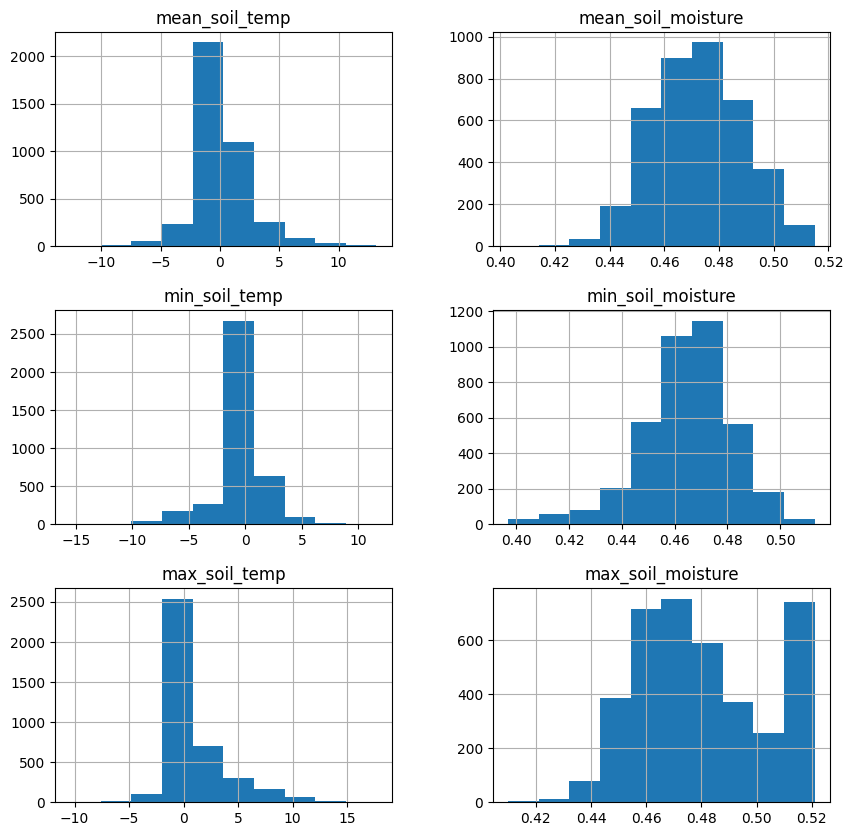

In [19]:
df_soil.hist(figsize=(10,10))

In [20]:
df_phil = read_philPred()

In [21]:
df_phil["prediction"].value_counts()

prediction
False    56
True     14
Name: count, dtype: int64

In [22]:
df = ExploreData.copy() # to avoid changing the original data 


| Names                         | Type                                                                     | Noise | Distribution                              |
|------------------------------|--------------------------------------------------------------------------|-------|-------------------------------------------|
| Date                         | Datetime                                                                 |       |                                           |
| Year                         | Numerical                                                                |       |                                           |
| Month                        | String                                                                   |       | Jan 8%,  Feb 8%,  Other (734) 83%           |
| Global Temperature Anomalies | Numerical                                                                |       |                                           |
| Nino 1+2 SST                 | Numerical, Sea Surface Temperature in °C                                 |       |                                           |
| Nino 1+2 SST Anomalies       | Sea Surface Temperature Anomalies, Numerical                             |       |                                           |
| Nino 3 SST                   | Numerical, 3 region Sea Surface Tempurature °C                           |       |                                           |
| Nino 3 SST Anomalies         | Numerical, Nino 3 region Sea Surface Temperature Anomalies (°C)          |       |                                           |
| Nino 3.4 SST                 | Numerical, Nino 3.4 region Sea Surface Temperature (°C)                  |       |                                           |
| Nino 3.4 SST Anomalies       | Numerical , Nino 3.4 region Sea Surface Temperature Anomalies (°C)       |       |                                           |
| Nino 4 SST                   | Numerical , NINO 3.4 region Sea Surface Temperature (°C)                 |       |                                           |
| Nino 4 SST Anomalies         | Numerical, NINO 4 region Sea Surface Temperature Anomalies(°C)           |       |                                           |
| TNI                          | Numerical, Trans-Nino Index                                              |       |                                           |
| PNA                          | Numerical, Pacific-North American Index                                  |       |                                           |
| OLR                          | Numerical, Outgoing Longwave Radiation (W/m2 )                           |       |                                           |
| SOI                          | Numerical, Southern Oscillation Index                                    |       |                                           |
| Season (2month)              | String , two month season, The letters stand for the months of the year  |       | DJ 8%, JF 8%, other (734) 83%               |
| MEI.v2                       | Numerical, Multivariate ENSO Index Version 2                             |       |                                           |
| Season (3month)              | String , three month season e.g DJF (Months of the Year)                 |       | DJF 8%, JFM 8%, other(734) 83%              |
| ONI                          | Numerical , Oceanic Nino index (°C)                                      |       |                                           |
| Season (12month)             | twelve month season e.g 1950–1951                                        |       | 1950-1951 1%,  1951-1952 1% ,Other(858) 97% |
| ENSO Phase-Intensity         | String ,yearly ENSO phase & intensity e.g SL (strong La Nina)            |       | N 26%, WL 18%, other (498) 56%              |

| Name               | Type       | Noise                                                                                                                                    | Distribution                                                                                        |
|--------------------|------------|------------------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------|
| Early Spring       | boolean    | None                                                                                                                                     | True 50%, False 50%                                                                                 |
| max_temp           | Numerical  | Missing values for some days and years                                                                                                   |                                                                                                     |
| min_temp           | Numerical  | No noise                                                                                                                                 | majority of the values in min_temp are above 24 degrees , their are some negative values            |
| Percipitation      | Numerical  | Also has 627 values as T                                                                                                                 |                                                                                                     |
| Snowfall           | Numerical  | Has some values that are T 666 of them                                                                                                   |                                                                                                     |
| snowdepth          | Numerical  | Some rows have T and M for values                                                                                                        | Majority of the values the snowdepth is 0.0 , T has 679 values , M has 62 values                    |
| avg_temp           | Numerical  | No noise                                                                                                                                 | 30 degrees average temparature has the most values at 89                                            |
| mean_soil_temp     | Numerical  | No noise                                                                                                                                 | Normal, centered around 0                                                                           |
| mean_soil_moisture | Numerical  | No Noise                                                                                                                                 | Uniform                                                                                             |
| min_soil_temp      | Numerical  | no                                                                                                                                       | normal-like distribution centered around 0 and a slight right skew.                                 |
| min_soil_moisture  | Numerical  | no                                                                                                                                       | normally distributed but has a narrower range compared to mean soil moisture, centered around 0.45. |
| max_soil_temp      | Numerical  | The smooth curve suggests minimal noise                                                                                                  | The distribution is slightly skewed to the right.                                                   |
| max_soil_moisture  | Numerical  | he multiple peaks could be a sign of variability in the data or represent different states of soil moisture that are naturally occurring | Displays a less clear pattern compared to other moisture measures, with multiple peaks              |
| prediction         | Boolean    | No noise                                                                                                                                 | 56 of values are false , 14 of the values are true                                                  |

In [23]:
df["early_spring"].value_counts()

early_spring
False    33
True     33
Name: count, dtype: int64

In [24]:
df.describe()

,Year,max_temp_01-01,max_temp_01-04,max_temp_01-05,max_temp_01-08,max_temp_01-10,max_temp_01-12,max_temp_01-13,max_temp_01-15,max_temp_01-17,...,SOI(DEC),SOI(FEB),SOI(JAN),SOI(JUL),SOI(JUN),SOI(MAR),SOI(MAY),SOI(NOV),SOI(OCT),SOI(SEP)
count,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.00000,...,64.000000,65.000000,65.000000,64.000000,65.000000,65.000000,65.000000,64.000000,64.000000,64.000000
mean,1986.969697,39.469697,38.378788,37.196970,34.439394,35.136364,37.848485,39.348485,35.530303,33.69697,...,0.192187,0.210769,0.201538,0.118750,0.167692,0.353846,0.164615,0.048437,0.125000,0.056250
std,21.701450,11.469317,13.570063,12.418621,12.947383,11.969045,13.521769,13.913460,12.029732,12.82182,...,1.072944,1.332892,1.220463,0.825367,0.662879,1.071809,0.719468,0.849461,0.932993,0.934841
min,1950.000000,12.000000,9.000000,11.000000,2.000000,8.000000,10.000000,14.000000,9.000000,-1.00000,...,-2.200000,-3.600000,-3.500000,-1.800000,-1.400000,-2.400000,-1.700000,-2.600000,-1.700000,-1.700000
25%,1969.500000,33.000000,30.000000,31.000000,25.000000,27.000000,26.250000,29.250000,25.250000,27.00000,...,-0.600000,-0.500000,-0.400000,-0.500000,-0.400000,-0.200000,-0.300000,-0.425000,-0.400000,-0.700000
50%,1986.500000,38.000000,36.000000,38.500000,34.000000,36.000000,38.500000,36.500000,34.500000,33.50000,...,0.000000,0.300000,0.300000,0.200000,0.200000,0.400000,0.300000,-0.050000,0.100000,0.100000
75%,2005.750000,44.750000,49.750000,43.750000,40.750000,44.000000,46.750000,47.500000,45.000000,42.50000,...,1.000000,1.200000,1.100000,0.600000,0.600000,1.100000,0.500000,0.550000,0.800000,0.725000
max,2023.000000,70.000000,71.000000,66.000000,69.000000,59.000000,69.000000,70.000000,65.000000,65.00000,...,2.900000,2.700000,2.400000,1.900000,1.700000,2.500000,1.400000,2.600000,1.800000,2.200000


In [25]:
df.info(show_counts=True) # show_counts=True will show the number of non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Columns: 831 entries, Year to early_spring
dtypes: bool(2), float64(547), int64(1), object(281)
memory usage: 427.7+ KB



# What is the target attribute?

- The target attribute is Early spring 

In [27]:
corr_matrix = df.corr()
corr_matrix["early_spring"].sort_values(ascending=False)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')


ValueError: could not convert string to float: 'M'